In [65]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from mpl_toolkits.mplot3d import Axes3D


生成数据

In [66]:
def generate_data(k = 2.0, b = 1.0, num_points = 100, noise_std = 1.0, seed = 42):
    """Generate random linear data with noise"""
    np.random.seed(seed)
    x = np.linspace(0, 10, num_points)
    noise = np.random.normal(0, noise_std, num_points)
    y = k * x + b + noise
    return x, y


In [67]:
x, y = generate_data(k = 2.5, b = 0.8, noise_std = 1.5)

均方误差

In [68]:
def mse_loss(y_true, y_pred):
    """Mean squared error (MSE)"""
    return (np.mean((y_true - y_pred) ** 2)) / 2


梯度下降

In [69]:
def gradient_descent(x, y, k_init = 0.0, b_init = 0.0, lr = 0.01, iterations = 100):
    """
    使用梯度下降法拟合线性回归参数。
    :param x: 输入特征
    :param y: 目标值
    """
    k, b = k_init, b_init
    n = len(x)
    losses = []
    params = []

    for i in range(iterations):
        y_pred = k * x + b
        loss = mse_loss(y, y_pred)
        losses.append(loss)
        params.append((k, b))

        dk = - (1 / n) * np.sum((y - y_pred) * x)
        db = - (1 / n) * np.sum((y - y_pred))

        k -= lr * dk
        b -= lr * db

    return k, b, losses, params

In [70]:
k_fit, b_fit, losses, params = gradient_descent(x, y, lr = 0.01, iterations = 100)

In [71]:
def plot_data_and_fit(x, y, k, b):
    """Plot data points and fitted line"""
    plt.figure(figsize = (8, 5))
    plt.scatter(x, y, c = "blue", alpha = 0.7, label = "Data points")
    plt.plot(x, k * x + b, "r-", linewidth = 2.5, label = f"Fitted line: y = {k:.2f}x + {b:.2f}")
    plt.xlabel("x")
    plt.ylabel("y")
    plt.title("Linear Regression Fit")
    plt.legend()
    plt.grid(True)
    plt.tight_layout()
    plt.show()
    

k_fit: 2.54, b_fit: 0.42


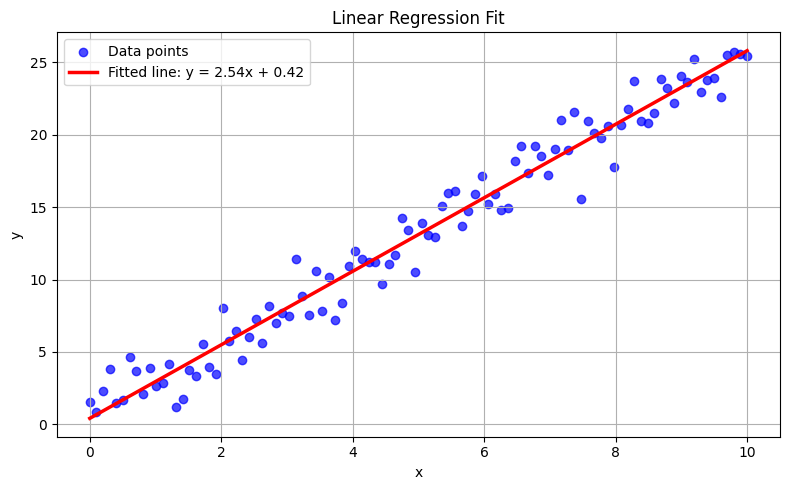

In [72]:
print(f"k_fit: {k_fit:.2f}, b_fit: {b_fit:.2f}")
plot_data_and_fit(x, y, k_fit, b_fit)   # 绘制数据点和拟合直线

In [73]:
def plot_loss_curve(losses):
    """Plot loss over iterations"""
    plt.figure(figsize = (8, 5))
    plt.plot(losses, "b-", linewidth = 2, label = "MSE")
    plt.xlabel("Iteration")
    plt.ylabel("MSE")
    plt.title("Loss function's value")
    plt.legend()
    plt.grid(True)
    plt.tight_layout()
    plt.show()
    

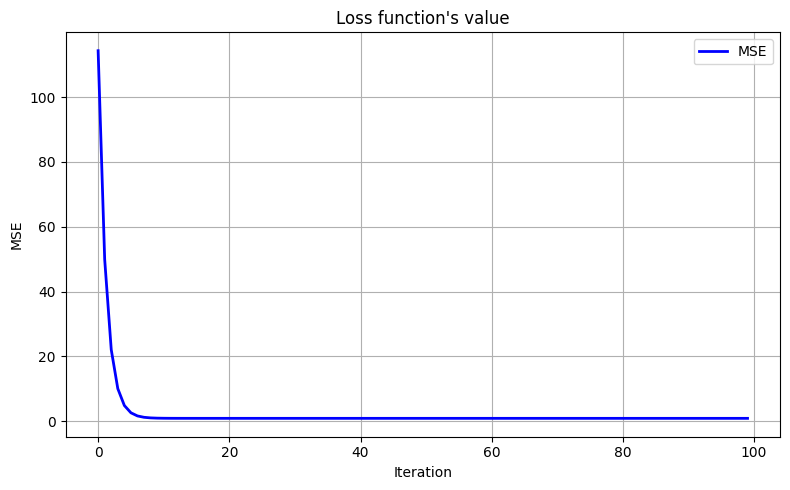

In [74]:
plot_loss_curve(losses) # 损失函数曲线

In [75]:
def plot_parameter_convergence(params):
    """绘制参数收敛过程"""
    k_values = [p[0] for p in params]
    b_values = [p[1] for p in params]
    plt.figure(figsize=(8, 5))
    plt.plot(k_values, label='k (slope)', color='green')
    plt.plot(b_values, label='b (intercept)', color='orange')
    plt.xlabel('Iteration')
    plt.ylabel('Parameter Value')
    plt.title('Parameter Convergence during Gradient Descent')
    plt.legend()
    plt.grid(True)
    plt.show()

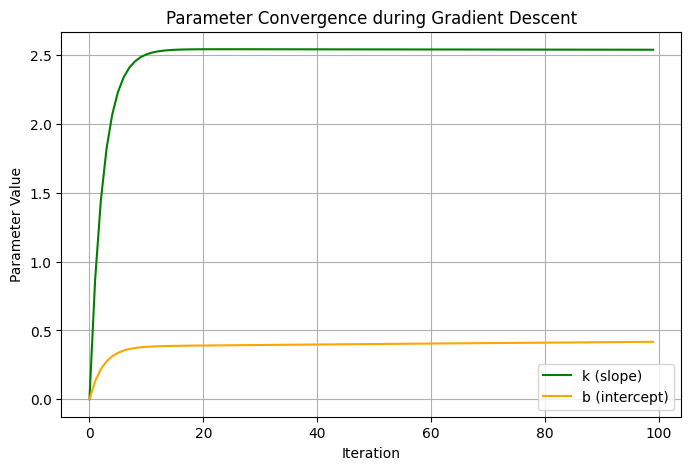

In [76]:
plot_parameter_convergence(params)  # 参数收敛过程

In [77]:
def plot_2d_contour_with_path(x, y, params, k = None, b = None):
    """Plot 2D MSE's contour and gradient descent path"""
    k_range = np.linspace(-1, 5, 100)
    b_range = np.linspace(-1, 5, 100)
    k_grid, b_grid = np.meshgrid(k_range, b_range)

    loss_grid = np.zeros_like(k_grid)
    for i in range(k_grid.shape[0]):
        for j in range(k_grid.shape[1]):
            y_pred = k_grid[i, j] * x + b_grid[i, j]
            loss_grid[i, j] = mse_loss(y, y_pred)

    k_path = [p[0] for p in params]
    b_path = [p[1] for p in params]

    plt.figure(figsize = (12, 8))
    contour = plt.contour(k_grid, b_grid, loss_grid, 30, cmap = 'viridis')
    plt.clabel(contour, inline = True, fontsize = 8)
    plt.colorbar(contour, label = "MSE")

    plt.plot(k_path, b_path, 'r-o', markersize = 4, linewidth = 1.5, label = "Gradient Descent Path")
    plt.scatter(k_path[0], b_path[0], color = 'green', s = 100, label = f"Start (k={k_path[0]}, b={b_path[0]})")
    plt.scatter(k_path[-1], b_path[-1], color = 'black', s = 100, label = f"Optimal (k={k_path[-1]:.2f}, b={b_path[-1]:.2f})")

    plt.xlabel('Slope (k)')
    plt.ylabel('Intercept (b)')
    plt.title('2D MSE\'s Contour Plot with Gradient Descent Path')
    plt.legend()
    plt.tight_layout()
    plt.grid(True)
    plt.show()


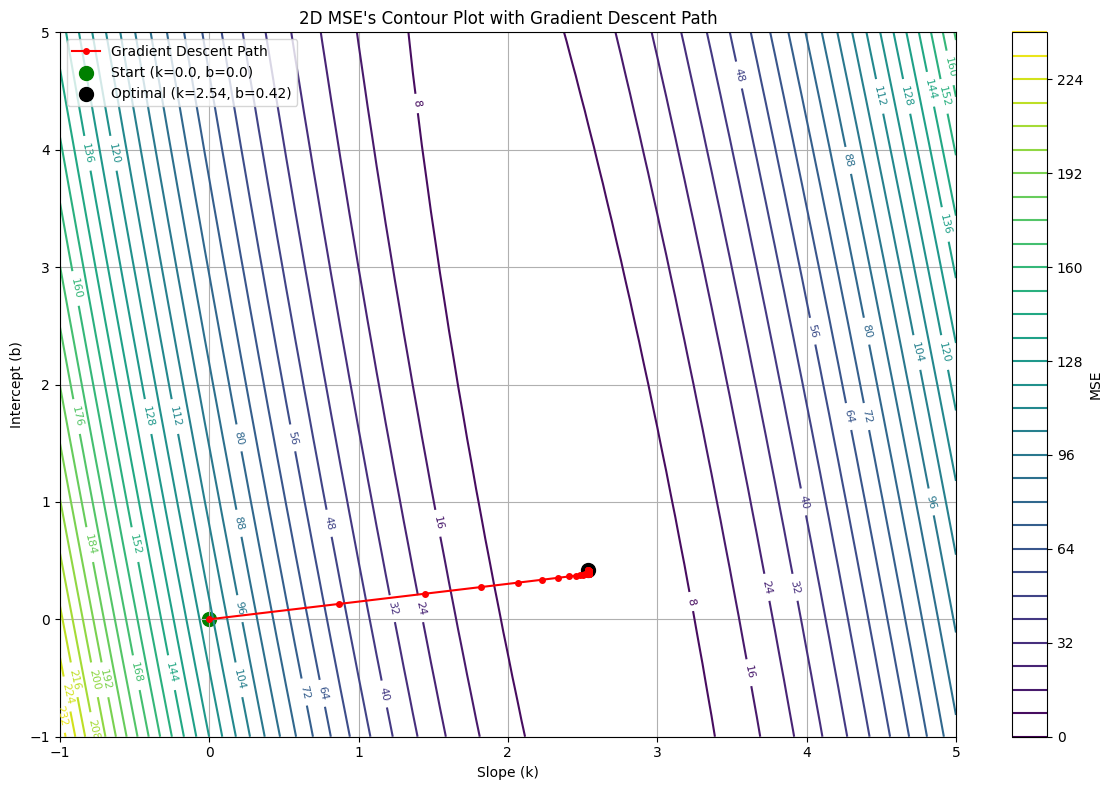

In [78]:
plot_2d_contour_with_path(x, y, params) # 2D MSE等高线图 + 梯度下降路径

In [79]:
def plot_3d_gradient_descent(x, y, params, losses):
    """绘制 3D 梯度下降路径和等高线"""
    k_range = np.linspace(-1, 5, 100)
    b_range = np.linspace(-1, 5, 100)
    k_grid, b_grid = np.meshgrid(k_range, b_range)

    loss_grid = np.zeros_like(k_grid)
    for i in range(k_grid.shape[0]):
        for j in range(k_grid.shape[1]):
            y_pred = k_grid[i, j] * x + b_grid[i, j]
            loss_grid[i, j] = mse_loss(y, y_pred)

    k_path = [p[0] for p in params]
    b_path = [p[1] for p in params]
    loss_path = losses

    fig = plt.figure(figsize=(12, 8))
    ax = fig.add_subplot(111, projection = "3d")

    surf = ax.plot_surface(k_grid, b_grid, loss_grid, cmap = "viridis", alpha = 0.5)
    fig.colorbar(surf, ax = ax, shrink = 0.5, aspect = 5, label = "MSE")

    ax.plot(k_path, b_path, loss_path, "r-", linewidth = 2, label = "Gradient Descent Path")
    ax.scatter(k_path, b_path, loss_path, c = "red", s = 20, label = "Steps")

    ax.contour(k_grid, b_grid, loss_grid, 30, offset = np.min(loss_grid) - 15, cmap = "viridis", linestyles = "solid")

    ax.set_xlabel("Slope (k)")
    ax.set_ylabel("Intercept (b)")
    ax.set_zlabel("MSE", labelpad = -5)
    ax.set_title("3D Gradient Descent Path with Contour")
    ax.legend(loc="upper left")
    plt.tight_layout()
    plt.show()

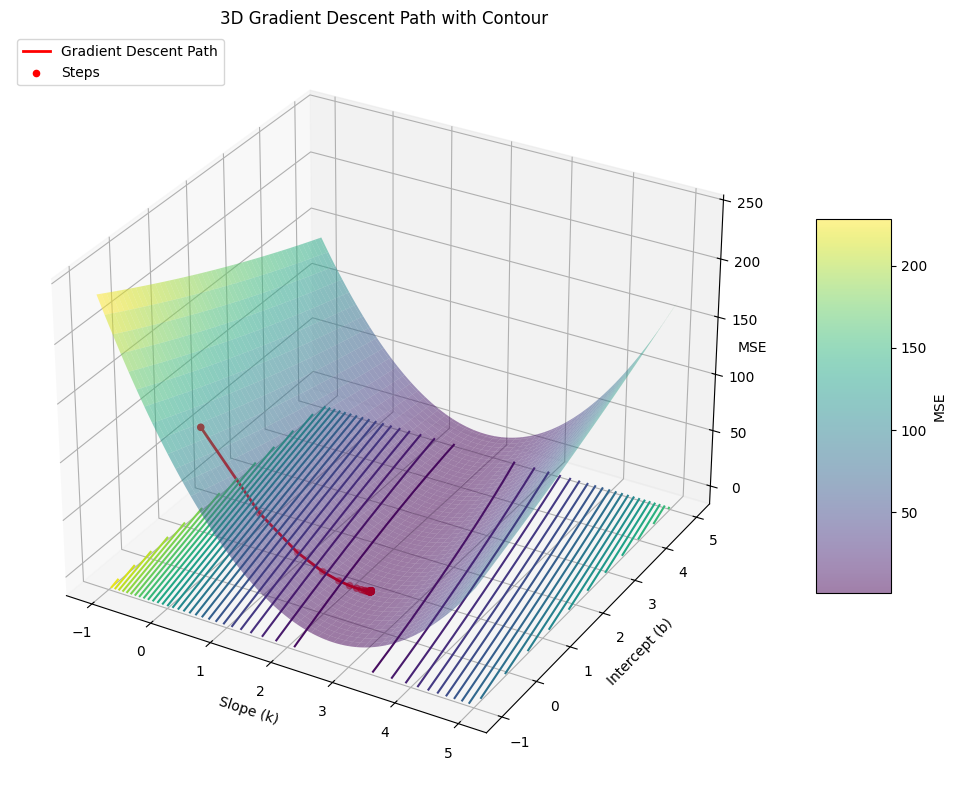

In [80]:
plot_3d_gradient_descent(x, y, params, losses)  # 3D 梯度下降路径 + 等高线